In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

<h2>Loading data</h2>

In [8]:
boston = datasets.load_boston()

data = pd.DataFrame(boston.data,columns=boston.feature_names)
data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<h2>Splitting the data</h2>

In [9]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10, random_state=42,
                                                                          shuffle=True)

<h2>Applyting GBDT and Evaluating the performance</h2>

In [10]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)
model.fit(x_training_set, y_training_set)

model_score = model.score(x_training_set, y_training_set)
print('R2 sq: ',model_score)
y_predicted = model.predict(x_test_set)

print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

R2 sq:  0.9800347273281851
Mean squared error: 5.82
Test Variance score: 0.91


<h2>Plotting the best fit line</h2>

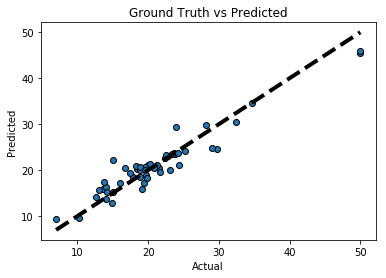

In [11]:
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()